In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import Series, DataFrame
import math as math



In [2]:
#import csv and assess data types
df = pd.read_csv('HistoricalQuotes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
date      1259 non-null object
close     1259 non-null float64
volume    1259 non-null float64
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [3]:
#convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [4]:
#sort data from oldest to newest
df = df.sort_values(by='date', ascending=True)
df.head()

,date,close,volume,open,high,low
1258,2014-09-04,98.12,85537710.0,98.85,100.09,97.79
1257,2014-09-05,98.97,58280030.0,98.80,99.39,98.31
1256,2014-09-08,98.36,46176570.0,99.30,99.31,98.05
1255,2014-09-09,97.99,189419500.0,99.08,103.08,96.14
1254,2014-09-10,101.00,100352500.0,98.01,101.11,97.76


In [5]:
#set date as index
df = df.set_index('date')

In [6]:
#view dataframe
df.head()

,close,volume,open,high,low
date,,,,,
2014-09-04,98.12,85537710.0,98.85,100.09,97.79
2014-09-05,98.97,58280030.0,98.80,99.39,98.31
2014-09-08,98.36,46176570.0,99.30,99.31,98.05
2014-09-09,97.99,189419500.0,99.08,103.08,96.14
2014-09-10,101.00,100352500.0,98.01,101.11,97.76


In [7]:
#Plot the rolling mean of closing price

close_p = df['close']
ma_close = close_p.rolling(window=100).mean()


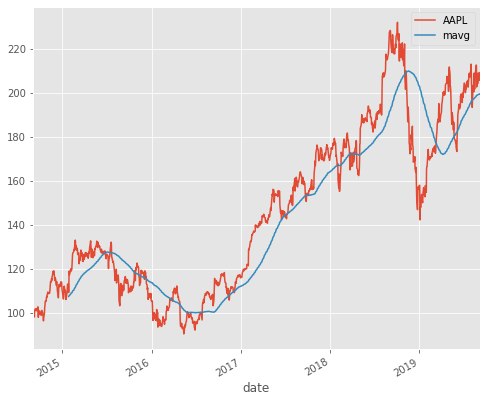

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_p.plot(label='AAPL')
ma_close.plot(label='mavg')
plt.legend()

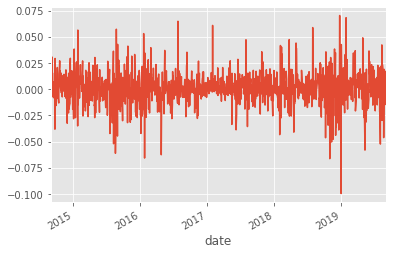

In [9]:
#plotting returns
returns = close_p /close_p.shift(1) - 1
returns.plot(label = 'returns')

In [10]:
#creating dataset for model with variables hl_pct and pct_change
df_reg = df.loc[:,['close','volume']]
df_reg['hl_pct'] = ((df['high'] - df['low'])/ df['close'])*100.0
df_reg['pct_change'] = ((df['close']- df['open'])/df['open'])*100.0
df_reg.head()

,close,volume,hl_pct,pct_change
date,,,,
2014-09-04,98.12,85537710.0,2.344068,-0.738493
2014-09-05,98.97,58280030.0,1.091240,0.172065
2014-09-08,98.36,46176570.0,1.281009,-0.946626
2014-09-09,97.99,189419500.0,7.082355,-1.100121
2014-09-10,101.00,100352500.0,3.316832,3.050709


In [11]:
#preparing predictor variable to predict out stock prices for the next 100 days
forecast_out = int(100)
df_reg['prediction'] = df_reg['close'].shift(-forecast_out)

In [12]:
#view tail of dataframe to view the shift of precition back 
df_reg.tail()

,close,volume,hl_pct,pct_change,prediction
date,,,,,
2019-08-28,205.53,15957630.0,1.167713,0.700637,NaN
2019-08-29,209.01,21007650.0,1.275059,0.244604,NaN
2019-08-30,208.74,21162560.0,1.556961,-0.675676,NaN
2019-09-03,205.70,20059570.0,1.341760,-0.353631,NaN
2019-09-04,209.19,19216820.0,1.032554,0.383896,NaN


In [13]:
#importing necessary regressors and objects for preprocessing, splitting training and test data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing, model_selection, svm

In [14]:
#creating input data for model
X = np.array(df_reg.drop(['prediction'], 1))
X = preprocessing.scale(X)

In [15]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 100
X = X[:-forecast_out]

In [17]:
X.shape

(1159, 4)

In [16]:
#creating labelled data for model
y = np.array(df_reg['prediction'])
y = y[:-forecast_out]

In [17]:
y.shape

(1159,)

In [18]:
#split into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [20]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [21]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [22]:
clfknn = KNeighborsRegressor()
clfknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [23]:
#assessing R^2 of regressions
print('Linear Regression: ', clfreg.score(X_test, y_test))
print('Q2 Regression: ',clfpoly2.score(X_test, y_test))
print('Q3 Regression: ',clfpoly3.score(X_test, y_test))
print('KNN Regression: ',clfknn.score(X_test, y_test))

Linear Regression:  0.7293537826410268
Q2 Regression:  0.7626512538015894
Q3 Regression:  -2.6245072510339185
KNN Regression:  0.8103934173781377


In [24]:
#knn has best R^2 so we utilise it to make predictions
forecast_prediction = clfknn.predict(X_forecast)
print(forecast_prediction)

[196.58  210.632 197.334 186.378 158.532 173.028 185.86  185.058 184.896
 176.558 165.238 191.788 179.782 183.286 158.708 177.692 192.37  172.302
 186.67  202.302 187.904 193.26  192.558 199.032 190.11  199.398 196.536
 191.774 197.518 188.716 198.066 194.352 210.332 191.638 184.308 189.62
 196.856 191.06  198.902 196.264 195.05  180.386 196.584 184.584 178.68
 190.624 180.168 200.326 202.878 197.116 182.57  191.534 181.704 216.66
 186.96  192.374 177.758 169.    205.528 179.564 170.318 184.896 184.782
 173.452 161.78  182.678 170.318 168.56  187.49  154.13  171.454 183.746
 152.622 152.504 167.452 194.294 197.866 186.682 203.264 189.788 192.152
 182.648 206.526 175.892 191.984 197.276 185.426 196.95  165.574 170.108
 152.61  178.554 192.576 165.338 173.844 164.526 153.718 180.146 163.582
 153.718]


In [26]:
#plotting forecast
last_date = df_reg.iloc[-1].name
print(last_date)
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
print(next_unix)

2019-09-04 00:00:00
2019-09-05 00:00:00


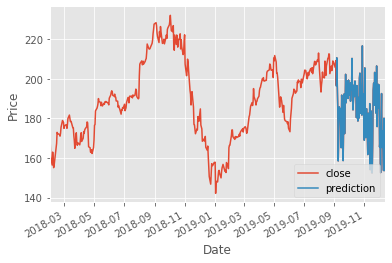

In [27]:
for i in forecast_prediction:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_reg.loc[next_date] = i
    
df_reg['close'].tail(500).plot()
df_reg['prediction'].tail(100).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()